In [39]:
import numpy as np
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [49]:
def load_data(fPath):
    df = pd.read_csv(fPath, header = None, skipinitialspace = True)
    # get classes to list
    data = df.iloc[:,:].to_numpy().copy()
    # get data to list
    #print(data.groupby(by=0).count())
    #print(df)
    #df2 = df.groupby([4,0], as_index = False).count()
    #print(df2)
    
    #df1 = df.iloc[:, 0:-1].to_numpy()
    #print(df1)
    return data

fPath = "B:/Workspaces/courses/CS580/assignments-1-2-3-testData/assign-3-testData/3-data-4.txt"#"dummy3.txt"
data = load_data(fPath)
print(data, data.shape)

[[ 1.    0.3   1.  ]
 [ 2.    0.4   1.  ]
 [ 3.    0.7   1.  ]
 [ 4.    0.9   1.  ]
 [ 5.    0.6   1.  ]
 [ 6.    0.45  1.  ]
 [ 7.    0.7   1.  ]
 [ 8.    0.8   1.  ]
 [ 9.    0.4   1.  ]
 [10.    0.8   1.  ]
 [11.    0.9   1.  ]
 [12.    1.    1.  ]
 [13.    0.67  1.  ]
 [14.    0.77  1.  ]
 [15.    0.56  1.  ]
 [16.    0.3   0.  ]
 [17.    0.2   0.  ]
 [18.    0.1   0.  ]
 [19.    0.3   0.  ]
 [20.    0.7   0.  ]
 [21.    0.3   0.  ]
 [22.    0.23  0.  ]
 [23.    0.34  0.  ]
 [24.    0.45  0.  ]
 [25.    0.34  0.  ]
 [26.    0.67  0.  ]
 [27.    0.1   0.  ]
 [28.    0.24  0.  ]
 [29.    0.45  0.  ]
 [30.    0.33  0.  ]] (30, 3)


##### Compute (1) the classification accuracy, (2) the positive class (represented by 1) precision, recall,
##### F1 score, and (3) TPR (true positive rate), FPR (false positive rate), sensitivity, and specificity.
##### Negative class is represented by 0. If Pr(1 | x) > 0.5, we predict x as positive; otherwise negative.

In [50]:
def convert_prob_to_class(dataIn):
    data = dataIn.copy()
    data[:,1] = np.where(data[:,1]>0.5,1,0)
    
    return data

data1 = convert_prob_to_class(data)

In [51]:
def compute_confusion_matrix(data):
    total = data.shape[0]
    # 1. Compute all Correct and wrong classifications
    wrong = np.abs(data[:,1] - data[:,2]).sum()
    correct = data.shape[0]- wrong
    accuracy = correct / total
    # Comptue all positive and negative predictions
    predPositive = data[data[:,1] ==1].shape[0]
    predNegative = data[data[:,1] ==0].shape[0]
     # Compute True positive, True Negative, Fase Positive, False Negative
    tp = data[ (data[:,1] ==1) & (data[:,2] == 1)].shape[0]
    tn = data[ (data[:,1] ==0) & (data[:,2] == 0)].shape[0]
    fp = data[ (data[:,1] ==1) & (data[:,2] == 0)].shape[0]
    fn = data[ (data[:,1] ==0) & (data[:,2] == 1)].shape[0]
    # Compute the total Positive and Negative (true conditions)
    totalPos = data[data[:,2] ==1].shape[0]
    totalNeg = data[data[:,2] ==0].shape[0]
    print(correct, wrong)
    print(tp,tn,fp,fn)
    # 2. Precision, Recall, F1
    precision = tp / predPositive
    recall = tp / totalPos
    f1 = 2 * (precision * recall) / (precision+recall)
    # 3. True Positive Rate, False Positive Rate Sensitivity, Specificity
    sensitivity = TPR = recall 
    FNR = fn / totalPos
    FPR = fp / totalNeg
    specificity = tn / totalNeg
    fullM = {'tp':tp, 'tn':tn,'fp':fp,'fn':fn,'accuracy':accuracy, 'precision':precision,'recall':recall, 'f1':f1,'sensitivity':sensitivity,
            'TPR':TPR,'FNR':FNR, 'FPR':FPR, 'specificity':specificity, 'total':total, 'predPositive':predPositive,'prednegative':predNegative,'totalPos':totalPos, 'totalNeg':totalNeg}
    sortM = {'Accuracy':accuracy, 'Precision':precision,'Recall':recall, 'F1':f1,'TPR':TPR,'FPR':FPR, 'Specificity':specificity, 'Sensitivity':sensitivity}
    return fullM, sortM
    
fullConfMatrix, shortM = compute_confusion_matrix(data1)
print(fullConfMatrix)

24.0 6.0
11 13 2 4
{'tp': 11, 'tn': 13, 'fp': 2, 'fn': 4, 'accuracy': 0.8, 'precision': 0.8461538461538461, 'recall': 0.7333333333333333, 'f1': 0.7857142857142856, 'sensitivity': 0.7333333333333333, 'TPR': 0.7333333333333333, 'FNR': 0.26666666666666666, 'FPR': 0.13333333333333333, 'specificity': 0.8666666666666667, 'total': 30, 'predPositive': 13, 'prednegative': 17, 'totalPos': 15, 'totalNeg': 15}


In [52]:
def conf_mat_to_str(confMatrix, sId =''):
    #print(*['({} {})\n'.format(k,v) for k,v in confMatrix.items()])
    retStr = '('+ str(sId) +'\n(' + '\n'.join('({} {})'.format(k,v) for k,v in confMatrix.items()) + ')\n)'
    return retStr
""
def write_string_to_file(s, wFile = '3_nagada2_nikolaos_agadakos.txt'):
    
    try:
        with open(wFile, 'w') as wf:
            wf.write(s)
    except Exception as e:
        print(e)
 
sId = '54'
confStr = conf_mat_to_str(shortM, sId = sId)
saveFile = '_'.join(('3','result.txt'))
write_string_to_file(confStr , wFile = saveFile)
print(confStr)

(54
((Accuracy 0.8)
(Precision 0.8461538461538461)
(Recall 0.7333333333333333)
(F1 0.7857142857142856)
(TPR 0.7333333333333333)
(FPR 0.13333333333333333)
(Specificity 0.8666666666666667)
(Sensitivity 0.7333333333333333))
)


AUC: 0.8222222222222223


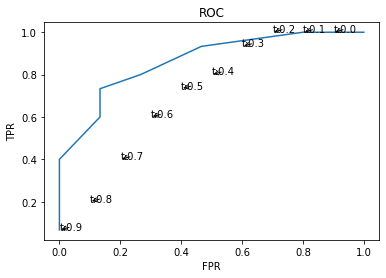

In [53]:
def compute_AUC(dataIn, threshold=np.arange(0.0,1, 0.1), sFile = '3_nagada2_nikolaos_agadakos_ROC.png'):
    TPR =  np.zeros(len(threshold))
    FPR  = np.zeros(len(threshold))
    for i,t in enumerate(threshold):
        data = dataIn.copy()
        data[:,1] = np.where(data[:,1]>t,1,0)
        tp = data[ (data[:,1] ==1) & (data[:,2] == 1)].shape[0]
        tn = data[ (data[:,1] ==0) & (data[:,2] == 0)].shape[0]
        fp = data[ (data[:,1] ==1) & (data[:,2] == 0)].shape[0]
        fn = data[ (data[:,1] ==0) & (data[:,2] == 1)].shape[0]
        # Comptue all positive and negative predictions
        predPositive = data[data[:,1] ==1].shape[0]
        predNegative = data[data[:,1] ==0].shape[0]
        # Compute the total Positive and Negative (true conditions)
        totalPos = data[data[:,2] ==1].shape[0]
        totalNeg = data[data[:,2] ==0].shape[0]
        TPR[i] = tp / totalPos
        FPR[i] = fp / totalNeg
    #print(threshold, TPR, FPR,tp,tn,fp,fn)
    # PLot AUC
    fig, ax = plt.subplots()
    plt.title("ROC")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    
    for i, t in enumerate(threshold):
        #print(t, FPR[i], TPR[i])
        ax.annotate('t:{0:.1f}'.format(t), (threshold[-1-i], TPR[i]), arrowprops={'arrowstyle':'->'})
    plt.plot(FPR, TPR)
    plt.savefig(sFile)
    # Manually compute AUC, using the trapezoid rule for integration.
    # Keep in mind that we compute this in reverse ( >threshold: 0 become class 1 so FPR,TRP =1 at index 1 of the arrays)
    # In order to accuratey compute the AUC in this setting we actaully take 1-area
    area = leftX = 0
    for tpr, fpr in zip(TPR,FPR):
        area += (fpr -leftX) * (tpr)
        leftX = fpr
        #print("Current area: ", 1-area)
    print("AUC:", 1-area)
    return 1-area
        
auc = compute_AUC(data, sFile = '_'.join(('3', sId, 'nikolaos_agadakos_ROC.png')))

0.3333333333333333

[0.         0.         0.66666667 0.66666667 1.        ] [0.  0.5 0.5 1.  1. ] [1.7 0.7 0.6 0.4 0.3]
